In [56]:
# Import modules
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

prec_data2 = session.query(Measurement.date,Measurement.prcp).all()

prcp_data = []
for date, precipitation in prec_data2:
    prcp_dict = {}
    prcp_dict["date"] = date
    prcp_dict["precipitation"] = precipitation
    prcp_data.append(prcp_dict)

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
data = engine.execute("SELECT * FROM measurement")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
data = engine.execute("SELECT date FROM measurement ORDER BY date DESC LIMIT 1")
datez = [list(x) for x in data]
most_recent_date = datez[0][0]
most_recent_date

'2017-08-23'

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_twelve_months_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurement.date,func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months_date).\
                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_data, columns=['Date', 'Precipitation'])
prec_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prec_df = prec_df.sort_index(ascending=True)
prec_df = prec_df.set_index(pd.to_datetime(prec_df.index))
prec_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [59]:
# Use Pandas Plotting with Matplotlib to plot the data
import hvplot.pandas

prec_plot = prec_df.hvplot.bar(title='Hawaii Precipitation 8-23-2017 to 8-24-2018',
                               ylabel='Precipitation (in)',
                                   grid=True)
prec_plot

:Bars   [Date]   (Precipitation)

In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [65]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs),\
              func.max(Measurement.tobs)).\
              filter(Measurement.station == most_active_station).all()
query_results

[(54.0, 71.66378066378067, 85.0)]

<AxesSubplot:title={'center':'Hawaii TOBS for Most Active Station 8-23-2017 to 8-24-2018'}, ylabel='Frequency'>

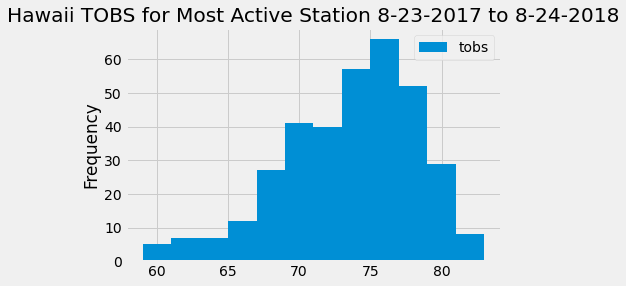

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date >= last_twelve_months_date).all()
tobs_df = pd.DataFrame(temperature_data)
tobs_df.rename(columns = {0:'station',1:'tobs'},inplace = True)
tobs_df.set_index('station', inplace=True)

tobs_plot = tobs_df.plot.hist(title='Hawaii TOBS for Most Active Station 8-23-2017 to 8-24-2018',
                               bins=12,grid=True,xlabel='Temperature (F)')
tobs_plot

# Close session

In [23]:
# Close Session
session.close()